# Netflix DataSet EDA Case Study

### Introduction

Netflix is a subscription based OTT platform and very popular in hosting TV series and movies. User can subscribe and login and watch at one place. It is a library of movies on cloud. 
Netlix charge some subscription fees from the users. It is epanding its business and now netflix is also in the business of production of movies and web series. 

We have Netflix dataset  for about 9k shows. We have to analyse and give them insights so that they can take some actions and understands what exactly is happening in the platform or what is consumed more on their platform.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')


# Data Information

In [2]:
df = pd.read_csv("D:\\Jupyter\\Netflix EDA\\netflix_titles.csv")
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# 1. Data Wrangling

### 1.1 Inspecting data

In [3]:
# Checking shape of the data
df.shape

(8807, 12)

Now we know that there are 8807 shows and 12 fields for each shows.

##### 5 Point summary

describe function is used to get the 5 number statistical summary of the quantitative variables of a data.
The focus points could be the Range, mean and median for each variable to get a better understanding of the variables.

In [4]:
# Checking 5 point summary with describe function

df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
df.size

105684

##### Column Details

In [6]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

##### Column Data Type Details

In [7]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

**info**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### Date Data type 

We can see from the info that date_added column is in object data type.so now lets change in to correct date time data type

In [9]:
#convert the datetime data type from object to datetime
df['date_added']=pd.to_datetime(df['date_added'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


### 1.2 Data cleansing

In [10]:
#also lets check and impute and missing date added values
##lets analyze for nulls in date_added and lets impute it with the most recent date from date_added.

In [11]:
df[df['date_added'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaT,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaT,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaT,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaT,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaT,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [12]:
recent_date=df['date_added'].max()
df.fillna({'date_added':recent_date},inplace=True)


In [13]:
###   Now lets add three new columns as year_added, month_added, day_added from date_added column
df['year_added']=df['date_added'].dt.year.astype(int)
df['month_added']=df['date_added'].dt.month.astype(int)
df['day_added']=df['date_added'].dt.strftime('%A')

In [14]:
## now we can drop date_added column
df.drop('date_added',axis=1,inplace=True)

In [15]:
df.head(5)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,Saturday
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,Friday
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,Friday
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,Friday
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,Friday


In [16]:
#duration column data cleansing
df[df['duration'].isnull()]

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017,4,Tuesday
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016,9,Friday
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,2016,8,Monday


Here we can see that rating column is errorneously filled with duration values. So no we have to chnage the duration values of these 
3 movies with the rating values

In [17]:
#impute correct duration values in the null rows
df.loc[df['director']=='Louis C.K.','duration']=df['rating']

In [18]:
##rectify the rating column as well by imputing nan as of now
df.loc[df['director']=='Louis C.K.','rating']=np.nan

### 1.3 Analysing Null Values

In [19]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
release_year       0
rating             7
duration           0
listed_in          0
description        0
year_added         0
month_added        0
day_added          0
dtype: int64

##### Getting the list of % Nulls in each column

In [20]:
null_perc=100*df.isnull().sum()/len(df)
null_perc.sort_values(ascending=False)

director        29.908028
country          9.435676
cast             9.367549
rating           0.079482
show_id          0.000000
type             0.000000
title            0.000000
release_year     0.000000
duration         0.000000
listed_in        0.000000
description      0.000000
year_added       0.000000
month_added      0.000000
day_added        0.000000
dtype: float64

Columns with a lot of NULLs are not useful for us as they would only capture data about a select applications. 

There is no standard rule for a good/bad % NULLs for columns to be used or discarded. It should be purely dependent on 
use case and application of the EDA.

Let's visually look at the columns with NULL and there NULL counts

In [21]:
null_col = df.isnull().sum().sort_values(ascending = False)
null_col = null_col[null_col.values >0]
null_col

director    2634
country      831
cast         825
rating         7
dtype: int64

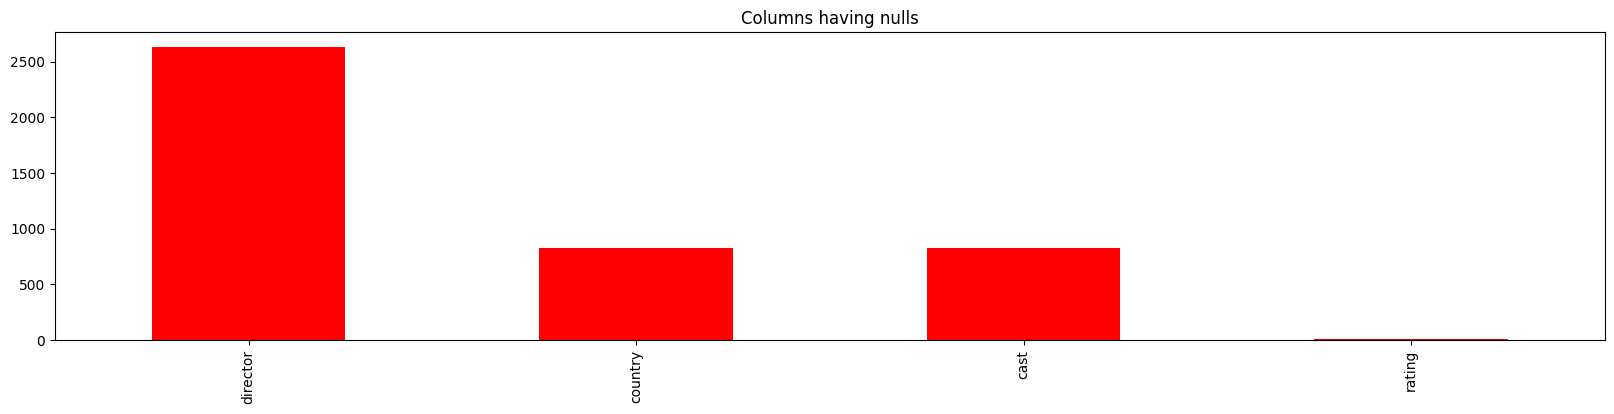

In [22]:
plt.figure(figsize=(20,4))
null_col.plot(kind='bar', color="red")
plt.title('Columns having nulls')
plt.show()

### Here we can see that null %  rating column is less than 1 % hence we can drop these rows

In [23]:
null_rating=list(df[df['rating'].isnull()].index)

In [24]:
df.drop(null_rating,inplace=True)

In [25]:
null_perc=100*df.isnull().sum()/len(df)
null_perc.sort_values(ascending=False)

director        29.897727
country          9.431818
cast             9.375000
show_id          0.000000
type             0.000000
title            0.000000
release_year     0.000000
rating           0.000000
duration         0.000000
listed_in        0.000000
description      0.000000
year_added       0.000000
month_added      0.000000
day_added        0.000000
dtype: float64

### Now lets see how many rows has null values of these  columns('cast','director','country')  together 
### If all these values are null then we can drop those rows as we cannot impute anything based on other columns

In [26]:
df.dropna(subset=['cast','director','country'],how='all',inplace=True)

In [27]:
null_perc=100*df.isnull().sum()/len(df)
null_perc.sort_values(ascending=False)

director        29.124540
country          8.432904
cast             8.375460
show_id          0.000000
type             0.000000
title            0.000000
release_year     0.000000
rating           0.000000
duration         0.000000
listed_in        0.000000
description      0.000000
year_added       0.000000
month_added      0.000000
day_added        0.000000
dtype: float64

## 2. Unnesting of data in columns like Cast,Director,Country,listed_in

In [28]:
cast_split=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
director_split=df['director'].apply(lambda x: str(x).split(', ')).tolist()
country_split=df['country'].apply(lambda x: str(x).split(', ')).tolist()
listed_split=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()


In [29]:
df_cast=pd.DataFrame(cast_split,index=df['title'])
df_director=pd.DataFrame(director_split,index=df['title'])
df_country=pd.DataFrame(country_split,index=df['title'])
df_listed=pd.DataFrame(listed_split,index=df['title'])

In [30]:
df_cast=df_cast.stack()

df_director=df_director.stack()

df_country=df_country.stack()

df_listed=df_listed.stack()


In [31]:
df_cast=pd.DataFrame(df_cast)
df_director=pd.DataFrame(df_director)
df_country=pd.DataFrame(df_country)
df_listed=pd.DataFrame(df_listed)



In [32]:
df_cast.reset_index(inplace=True)
df_director.reset_index(inplace=True)
df_country.reset_index(inplace=True)
df_listed.reset_index(inplace=True)

In [33]:
df_cast=df_cast[['title',0]]

df_director=df_director[['title',0]]

df_country=df_country[['title',0]]

df_listed=df_listed[['title',0]]

In [34]:
df_cast.columns=['title','cast']
df_director.columns=['title','director']
df_country.columns=['title','country']
df_listed.columns=['title','listed_in']

In [35]:
df_all=pd.merge(pd.merge(pd.merge(df_cast,df_director,on='title'),df_country, on='title'),df_listed,on='title')


In [36]:
df_final=df.reset_index().merge(df_all, on='title', how='inner')
df_final.head()

,index,show_id,type,title,director_x,cast_x,country_x,release_year,rating,duration,listed_in_x,description,year_added,month_added,day_added,cast_y,director_y,country_y,listed_in_y
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,Saturday,nan,Kirsten Johnson,United States,Documentaries
1,1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,Friday,Ama Qamata,nan,South Africa,International TV Shows
2,1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,Friday,Ama Qamata,nan,South Africa,TV Dramas
3,1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,Friday,Ama Qamata,nan,South Africa,TV Mysteries
4,1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,Friday,Khosi Ngema,nan,South Africa,International TV Shows


In [37]:
df_final.replace('nan', np.nan, inplace=True)

In [38]:
null_perc=100*df_final.isnull().sum()/len(df_final)
null_perc.sort_values(ascending=False)

director_y      24.982527
director_x      24.982527
country_y        5.805083
country_x        5.805083
cast_x           0.972553
cast_y           0.972553
index            0.000000
description      0.000000
day_added        0.000000
month_added      0.000000
year_added       0.000000
duration         0.000000
listed_in_x      0.000000
show_id          0.000000
rating           0.000000
release_year     0.000000
title            0.000000
type             0.000000
listed_in_y      0.000000
dtype: float64

In [39]:

df_final.drop(['director_x','cast_x','listed_in_x','country_x'],axis=1,inplace=True)

In [40]:
null_perc=100*df_final.isnull().sum()/len(df_final)
null_perc.sort_values(ascending=False)

director_y      24.982527
country_y        5.805083
cast_y           0.972553
index            0.000000
show_id          0.000000
type             0.000000
title            0.000000
release_year     0.000000
rating           0.000000
duration         0.000000
description      0.000000
year_added       0.000000
month_added      0.000000
day_added        0.000000
listed_in_y      0.000000
dtype: float64

In [41]:
df_final.rename(columns={'cast_y':'cast','director_y':'director','listed_in_y':'listed_in','country_y':'country'},inplace=True)

In [42]:
df_final['country'] = df_final['country'].replace({'United Kingdom,': 'United Kingdom', 'Cambodia,':'Cambodia','United States,':'United States',
                                                  'Poland,':'Poland',})

## Now final datframe is below after unnesting

In [43]:
df_final.head()

,index,show_id,type,title,release_year,rating,duration,description,year_added,month_added,day_added,cast,director,country,listed_in
0,0,s1,Movie,Dick Johnson Is Dead,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",2021,9,Saturday,NaN,Kirsten Johnson,United States,Documentaries
1,1,s2,TV Show,Blood & Water,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,9,Friday,Ama Qamata,NaN,South Africa,International TV Shows
2,1,s2,TV Show,Blood & Water,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,9,Friday,Ama Qamata,NaN,South Africa,TV Dramas
3,1,s2,TV Show,Blood & Water,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,9,Friday,Ama Qamata,NaN,South Africa,TV Mysteries
4,1,s2,TV Show,Blood & Water,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,9,Friday,Khosi Ngema,NaN,South Africa,International TV Shows


In [45]:
df_final.shape

(201737, 15)

## 3. Lets Analysze Null Values in CAST column and impute by pairing with director and country.

### 3.1 First lets pair up director and cast and impute as per the mode/max number of times paired

In [46]:
# Group the dataset by director and actor and calculate the count
pair_count = df_final.groupby(['director', 'cast']).size().reset_index(name='count')

# Find the actor with maximum occurrences for each director
max_cast = pair_count.groupby('director')['count'].idxmax()
director_cast_mapping = pair_count.loc[max_cast, ['director', 'cast']]

# Impute null actors
def impute_null_cast(row):
    director = row['director']
    cast = row['cast']
    
    if pd.isnull(cast):
        matching_director = director_cast_mapping[director_cast_mapping['director'] == director]
        
        if not matching_director.empty:
            cast = matching_director['cast'].values[0]
    
    return cast

df_final['cast'] = df_final.apply(impute_null_cast, axis=1)



In [47]:
null_perc=100*df_final.isnull().sum()/len(df_final)
null_perc.sort_values(ascending=False)

director        24.982527
country          5.805083
cast             0.878371
index            0.000000
show_id          0.000000
type             0.000000
title            0.000000
release_year     0.000000
rating           0.000000
duration         0.000000
description      0.000000
year_added       0.000000
month_added      0.000000
day_added        0.000000
listed_in        0.000000
dtype: float64

### 3.2 Now lets pair up country and cast and impute as per the mode/max number of times paired

In [48]:
# Group the dataset by country and actor and calculate the count
pair_count = df_final.groupby(['country', 'cast']).size().reset_index(name='count')

# Find the actor with maximum occurrences for each director
max_cast = pair_count.groupby('country')['count'].idxmax()
country_cast_mapping = pair_count.loc[max_cast, ['country', 'cast']]

# Impute null actors
def impute_null_cast(row):
    country = row['country']
    cast = row['cast']
    
    if pd.isnull(cast):
        matching_country = country_cast_mapping[country_cast_mapping['country'] == country]
        
        if not matching_country.empty:
            cast = matching_country['cast'].values[0]
    
    return cast

df_final['cast'] = df_final.apply(impute_null_cast, axis=1)



In [49]:
null_perc=100*df_final.isnull().sum()/len(df_final)
null_perc.sort_values(ascending=False)

director        24.982527
country          5.805083
cast             0.055518
index            0.000000
show_id          0.000000
type             0.000000
title            0.000000
release_year     0.000000
rating           0.000000
duration         0.000000
description      0.000000
year_added       0.000000
month_added      0.000000
day_added        0.000000
listed_in        0.000000
dtype: float64

In [50]:
df_final[df_final['cast'].isnull()]

,index,show_id,type,title,release_year,rating,duration,description,year_added,month_added,day_added,cast,director,country,listed_in
506,16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,2020,TV-MA,67 min,Declassified documents reveal the post-WWII li...,2021,9,Wednesday,NaN,Pedro de Echave García,NaN,Documentaries
507,16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,2020,TV-MA,67 min,Declassified documents reveal the post-WWII li...,2021,9,Wednesday,NaN,Pedro de Echave García,NaN,International Movies
508,16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,2020,TV-MA,67 min,Declassified documents reveal the post-WWII li...,2021,9,Wednesday,NaN,Pablo Azorín Williams,NaN,Documentaries
509,16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,2020,TV-MA,67 min,Declassified documents reveal the post-WWII li...,2021,9,Wednesday,NaN,Pablo Azorín Williams,NaN,International Movies
1124,45,s46,Movie,My Heroes Were Cowboys,2021,PG,23 min,Robin Wiltshire's painful childhood was rescue...,2021,9,Thursday,NaN,Tyler Greco,NaN,Documentaries
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186109,8162,s8163,Movie,Tellur Aliens,2016,TV-Y7,67 min,Three teenaged best friends on the planet Tell...,2016,12,Thursday,NaN,Einar Gabbassov,Kazakhstan,Children & Family Movies
193492,8450,s8451,Movie,The Perfect Day,2018,TV-14,93 min,"French soccer fans, celebrities and athletes r...",2018,9,Saturday,NaN,Jean-Pierre Devillers,NaN,Documentaries
193493,8450,s8451,Movie,The Perfect Day,2018,TV-14,93 min,"French soccer fans, celebrities and athletes r...",2018,9,Saturday,NaN,Jean-Pierre Devillers,NaN,International Movies
193494,8450,s8451,Movie,The Perfect Day,2018,TV-14,93 min,"French soccer fans, celebrities and athletes r...",2018,9,Saturday,NaN,Jean-Pierre Devillers,NaN,Sports Movies


### now the rest null cast rows doesnt have any corresponding actor or country to pair hence we can drop it as the % is also less than 1 %

In [51]:
null_cast=list(df_final[df_final['cast'].isnull()].index)
df_final.drop(null_cast,inplace=True)

In [52]:
null_perc=100*df_final.isnull().sum()/len(df_final)
null_perc.sort_values(ascending=False)

director        24.996404
country          5.758710
index            0.000000
show_id          0.000000
type             0.000000
title            0.000000
release_year     0.000000
rating           0.000000
duration         0.000000
description      0.000000
year_added       0.000000
month_added      0.000000
day_added        0.000000
cast             0.000000
listed_in        0.000000
dtype: float64

### Now we can see that cast null value is zero now.


### 3.3 Lets Analysze Null Values in COUNTRY column and impute by pairing with director and cast.
### Means for eg if any director  'XYZ'  has directed a movie and the country is "ABC" we can impute "ABC" for his other movie country column as there is maximum chances that his all movies will be from same country. And same logic for actor and country pair as well

In [53]:
# Group by director and country, and count the occurrences
grouped = df_final.groupby(['director', 'country']).size().reset_index(name='count')

# Find the most frequent country for each director
idx = grouped.groupby('director')['count'].idxmax()
most_frequent_country = grouped.loc[idx, ['director', 'country']].set_index('director')

# Create a dictionary mapping directors to their most frequent country
director_country_map = most_frequent_country['country'].to_dict()

# Impute missing countries based on the most frequent country for each director
df_final['country'] = df_final.apply(lambda row: director_country_map[row['director']] if pd.isnull(row['country']) and row['director'] in director_country_map else row['country'], axis=1)

In [54]:
null_perc=100*df_final.isnull().sum()/len(df_final)
null_perc.sort_values(ascending=False)

director        24.996404
country          4.428022
index            0.000000
show_id          0.000000
type             0.000000
title            0.000000
release_year     0.000000
rating           0.000000
duration         0.000000
description      0.000000
year_added       0.000000
month_added      0.000000
day_added        0.000000
cast             0.000000
listed_in        0.000000
dtype: float64

### 3.4 Now pair with cast to impute null country

In [55]:
# Group by cast and country, and count the occurrences
grouped = df_final.groupby(['cast', 'country']).size().reset_index(name='count')

# Find the most frequent country for each cast
idx = grouped.groupby('cast')['count'].idxmax()
most_frequent_country = grouped.loc[idx, ['cast', 'country']].set_index('cast')

# Create a dictionary mapping cast to their most frequent country
cast_country_map = most_frequent_country['country'].to_dict()

# Impute missing countries based on the most frequent country for each director
df_final['country'] = df_final.apply(lambda row: cast_country_map[row['cast']] if pd.isnull(row['country']) and row['cast'] in cast_country_map else row['country'], axis=1)



In [56]:
null_perc=100*df_final.isnull().sum()/len(df_final)
null_perc.sort_values(ascending=False)

director        24.996404
country          2.355363
index            0.000000
show_id          0.000000
type             0.000000
title            0.000000
release_year     0.000000
rating           0.000000
duration         0.000000
description      0.000000
year_added       0.000000
month_added      0.000000
day_added        0.000000
cast             0.000000
listed_in        0.000000
dtype: float64

In [57]:
df_final[df_final['country'].isnull()]

,index,show_id,type,title,release_year,rating,duration,description,year_added,month_added,day_added,cast,director,country,listed_in
351,11,s12,TV Show,Bangkok Breaking,2021,TV-MA,1 Season,"Struggling to earn a living in Bangkok, a man ...",2021,9,Thursday,Sukollawat Kanarot,Kongkiat Komesiri,NaN,Crime TV Shows
352,11,s12,TV Show,Bangkok Breaking,2021,TV-MA,1 Season,"Struggling to earn a living in Bangkok, a man ...",2021,9,Thursday,Sukollawat Kanarot,Kongkiat Komesiri,NaN,International TV Shows
353,11,s12,TV Show,Bangkok Breaking,2021,TV-MA,1 Season,"Struggling to earn a living in Bangkok, a man ...",2021,9,Thursday,Sukollawat Kanarot,Kongkiat Komesiri,NaN,TV Action & Adventure
357,11,s12,TV Show,Bangkok Breaking,2021,TV-MA,1 Season,"Struggling to earn a living in Bangkok, a man ...",2021,9,Thursday,Pavarit Mongkolpisit,Kongkiat Komesiri,NaN,Crime TV Shows
358,11,s12,TV Show,Bangkok Breaking,2021,TV-MA,1 Season,"Struggling to earn a living in Bangkok, a man ...",2021,9,Thursday,Pavarit Mongkolpisit,Kongkiat Komesiri,NaN,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199671,8718,s8719,Movie,Westside vs. the World,2019,TV-MA,96 min,A look into the journey of influential strengt...,2019,8,Friday,Louie Simmons,Michael Fahey,NaN,Sports Movies
200487,8759,s8760,Movie,World's Weirdest Homes,2015,TV-PG,49 min,From a bubble-shaped palace to an island built...,2019,2,Friday,Charlie Luxton,Storm Theunissen,NaN,Movies
201170,8785,s8786,TV Show,YOM,2016,TV-Y7,1 Season,"With the mind of a human being, and the body o...",2018,6,Thursday,Sairaj,NaN,NaN,Kids' TV
201171,8785,s8786,TV Show,YOM,2016,TV-Y7,1 Season,"With the mind of a human being, and the body o...",2018,6,Thursday,Devyani Dagaonkar,NaN,NaN,Kids' TV


### 3.5 Now null countries coresponding director and actor has no country filled in the dataset hence we cannot impute any country here, Hence we can drop it . Also the null % is only 2%

In [62]:
null_country=list(df_final[df_final['country'].isnull()].index)

In [63]:
df_final.drop(null_country,inplace=True)

In [64]:
null_perc=100*df_final.isnull().sum()/len(df_final)
null_perc.sort_values(ascending=False)

director        24.263496
index            0.000000
show_id          0.000000
type             0.000000
title            0.000000
release_year     0.000000
rating           0.000000
duration         0.000000
description      0.000000
year_added       0.000000
month_added      0.000000
day_added        0.000000
cast             0.000000
country          0.000000
listed_in        0.000000
dtype: float64

In [65]:
df_final.shape

(196876, 15)

### 3.5 Now lets work final column DIRECTOR for  imputing  null values 
### pair with coresoponding cast and impute with the maximum actor, director pair

In [66]:
# Identify records with null director names
null_director_records = df_final[df_final['director'].isnull()]

# Create a mapping to store collaboration counts
collaboration_counts = {}

# Iterate through the dataset and count collaborations
for index, row in df_final.iterrows():
    cast = row['cast']
    director = row['director']
    
    if pd.isnull(director):
        continue
    
    if cast not in collaboration_counts:
        collaboration_counts[cast] = {}
    
    if director not in collaboration_counts[cast]:
        collaboration_counts[cast][director] = 0
    
    collaboration_counts[cast][director] += 1

In [67]:
collaboration_counts

{'James Franco': {'Kirsten Johnson': 1,
  'Luke Holland': 1,
  'Evan Goldberg': 2,
  'Seth Rogen': 2,
  'Billy Corben': 4,
  'Kristine Stolakis': 2,
  'David Gordon Green': 2,
  'Louie Schwartzberg': 1,
  'Viridiana Lieberman': 2,
  'Jerry Rothwell': 1,
  'Ian Cheney': 2,
  'Sharon Shattuck': 1,
  'James Moll': 1,
  'Shantrelle P. Lewis': 1,
  'Joshua Zeman': 2,
  'Fredrick Munk': 1,
  'Moyoung Jin': 1,
  'Caroline Sá': 1,
  'Deepti Kakkar': 1,
  'Fahad Mustafa': 1,
  'Hikaru Toda': 1,
  'Chico Pereira': 1,
  'Elaine McMillion Sheldon': 3,
  'Shalini Kantayya': 2,
  'Adrián García Bogliano': 3,
  'Ali Tabrizi': 1,
  'Taylor Morden': 1,
  'Tyler Measom': 2,
  'Gary Fleder': 1,
  'Tiller Russell': 3,
  'Frank E. Abney III': 2,
  'Will McCormack': 1,
  'Michael Govier': 1,
  'Sabaah Folayan': 1,
  'Damon Davis': 1,
  'Steven Bognar': 2,
  'Julia Reichert': 2,
  'James Tovell': 1,
  'Kief Davidson': 3,
  'Pedro Kos': 1,
  'Adam Bolt': 1,
  'Lindsey Cordero': 2,
  'Armando Croda': 2,
  'Jen

In [68]:
 # Update null director names with most collaborated director
for index, row in null_director_records.iterrows():
    cast = row['cast']
    
    if cast in collaboration_counts:
        most_collaborated_director = max(collaboration_counts[cast], key=collaboration_counts[cast].get)
        df_final.at[index, 'director'] = most_collaborated_director

In [69]:
null_perc=100*df_final.isnull().sum()/len(df_final)
null_perc.sort_values(ascending=False)

director        15.001829
index            0.000000
show_id          0.000000
type             0.000000
title            0.000000
release_year     0.000000
rating           0.000000
duration         0.000000
description      0.000000
year_added       0.000000
month_added      0.000000
day_added        0.000000
cast             0.000000
country          0.000000
listed_in        0.000000
dtype: float64

### pair with corresponding cast and impute with the maximum country, director pair

In [70]:
# Identify records with null director names
null_director_records = df_final[df_final['director'].isnull()]

# Create a mapping to store collaboration counts
collaboration_counts = {}

# Iterate through the dataset and count collaborations
for index, row in df_final.iterrows():
    country = row['country']
    director = row['director']
    
    if pd.isnull(director):
        continue
    
    if country not in collaboration_counts:
        collaboration_counts[country] = {}
    
    if director not in collaboration_counts[country]:
        collaboration_counts[country][director] = 0
    
    collaboration_counts[country][director] += 1

In [71]:
collaboration_counts

{'United States': {'Kirsten Johnson': 1,
  'Mike Flanagan': 110,
  'Robert Cullen': 17,
  'José Luis Ucha': 10,
  'Haile Gerima': 24,
  'Theodore Melfi': 32,
  'Richard Shepard': 20,
  'Gerard McMurray': 38,
  'Mark Neveldine': 22,
  'Charles Stone III': 64,
  'Shojiro Nishimi': 16,
  'Adam Salky': 2,
  'Olivier Megaton': 30,
  'Alex Woo': 47,
  'Stanley Moore': 51,
  'Dennis Dugan': 63,
  'Scott Stewart': 99,
  'Robert Luketic': 138,
  'Beeban Kidron': 48,
  'Dave Needham': 29,
  'Amy Poehler': 62,
  'Tom Gianas': 38,
  'Tyler Spindel': 38,
  'Kevin Smith': 170,
  'George Nolfi': 21,
  'Chad Van De Keere': 46,
  'Mitch Schauer': 68,
  'Savage Steve Holland': 144,
  'Thomas Astruc': 66,
  'Greg Rankin': 110,
  'Jericca Cleland': 67,
  'Andrés Couturier': 37,
  'Jérémie Degruson': 15,
  'Mark A.Z. Dippé': 103,
  'Steven Spielberg': 264,
  'Jeannot Szwarc': 30,
  'Joe Alves': 31,
  'Joseph Sargent': 35,
  'Daniel Espinosa': 16,
  'Antoine Fuqua': 85,
  'Kirk DeMicco': 22,
  'David Yarove

In [72]:
 # Update null director names with most collaborated director,country pair
for index, row in null_director_records.iterrows():
    country = row['country']
    
    if country in collaboration_counts:
        most_collaborated_director = max(collaboration_counts[country], key=collaboration_counts[country].get)
        df_final.at[index, 'director'] = most_collaborated_director

In [73]:
null_perc=100*df_final.isnull().sum()/len(df_final)
null_perc.sort_values(ascending=False)

director        0.016762
index           0.000000
show_id         0.000000
type            0.000000
title           0.000000
release_year    0.000000
rating          0.000000
duration        0.000000
description     0.000000
year_added      0.000000
month_added     0.000000
day_added       0.000000
cast            0.000000
country         0.000000
listed_in       0.000000
dtype: float64

In [74]:
df_final[df_final['director'].isnull()]

,index,show_id,type,title,release_year,rating,duration,description,year_added,month_added,day_added,cast,director,country,listed_in
53032,2238,s2239,TV Show,Sunny Bunnies,2016,TV-Y,2 Seasons,Furry little bunnies hop through wild adventur...,2020,7,Wednesday,Svetlana Tsimokhina,NaN,Belarus,British TV Shows
53033,2238,s2239,TV Show,Sunny Bunnies,2016,TV-Y,2 Seasons,Furry little bunnies hop through wild adventur...,2020,7,Wednesday,Svetlana Tsimokhina,NaN,Belarus,Kids' TV
53034,2238,s2239,TV Show,Sunny Bunnies,2016,TV-Y,2 Seasons,Furry little bunnies hop through wild adventur...,2020,7,Wednesday,Svetlana Tsimokhina,NaN,Belarus,TV Comedies
53035,2238,s2239,TV Show,Sunny Bunnies,2016,TV-Y,2 Seasons,Furry little bunnies hop through wild adventur...,2020,7,Wednesday,Dmitri Davidovich,NaN,Belarus,British TV Shows
53036,2238,s2239,TV Show,Sunny Bunnies,2016,TV-Y,2 Seasons,Furry little bunnies hop through wild adventur...,2020,7,Wednesday,Dmitri Davidovich,NaN,Belarus,Kids' TV
53037,2238,s2239,TV Show,Sunny Bunnies,2016,TV-Y,2 Seasons,Furry little bunnies hop through wild adventur...,2020,7,Wednesday,Dmitri Davidovich,NaN,Belarus,TV Comedies
63380,2660,s2661,TV Show,Nicky Jam: El Ganador,2018,TV-MA,1 Season,Follow reggaeton artist Nicky Jam's struggles ...,2020,4,Tuesday,Nicky Jam,NaN,Puerto Rico,Crime TV Shows
63381,2660,s2661,TV Show,Nicky Jam: El Ganador,2018,TV-MA,1 Season,Follow reggaeton artist Nicky Jam's struggles ...,2020,4,Tuesday,Nicky Jam,NaN,Puerto Rico,International TV Shows
63382,2660,s2661,TV Show,Nicky Jam: El Ganador,2018,TV-MA,1 Season,Follow reggaeton artist Nicky Jam's struggles ...,2020,4,Tuesday,Nicky Jam,NaN,Puerto Rico,Spanish-Language TV Shows
63389,2660,s2661,TV Show,Nicky Jam: El Ganador,2018,TV-MA,1 Season,Follow reggaeton artist Nicky Jam's struggles ...,2020,4,Tuesday,Diego Cadavid,NaN,Puerto Rico,Crime TV Shows


### the remaining null directors are the rows shows where the corresponsing cast,director column doesnot have any pair to impute. 
### so lets drop it and also the %null is v less here as well

In [75]:
null_director=list(df_final[df_final['director'].isnull()].index)
df_final.drop(null_director,inplace=True)


### lets see the final null %. we can see that now total null values are zero

In [76]:
null_perc=100*df_final.isnull().sum()/len(df_final)
null_perc.sort_values(ascending=False)

index           0.0
show_id         0.0
type            0.0
title           0.0
release_year    0.0
rating          0.0
duration        0.0
description     0.0
year_added      0.0
month_added     0.0
day_added       0.0
cast            0.0
director        0.0
country         0.0
listed_in       0.0
dtype: float64

In [77]:
df_final.shape

(196843, 15)

In [190]:
df_final.head(5)

,index,show_id,type,title,release_year,rating,duration,description,year_added,month_added,day_added,cast,director,country,listed_in
0,0,s1,Movie,Dick Johnson Is Dead,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",2021,9,Saturday,James Franco,Kirsten Johnson,United States,Documentaries
1,1,s2,TV Show,Blood & Water,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,9,Friday,Ama Qamata,Adze Ugah,South Africa,International TV Shows
2,1,s2,TV Show,Blood & Water,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,9,Friday,Ama Qamata,Adze Ugah,South Africa,TV Dramas
3,1,s2,TV Show,Blood & Water,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,9,Friday,Ama Qamata,Adze Ugah,South Africa,TV Mysteries
4,1,s2,TV Show,Blood & Water,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,9,Friday,Khosi Ngema,Adze Ugah,South Africa,International TV Shows


# 4. counts of each categorical variable both using graphical and nongraphical analysis.

### 4.1 Category type comparision

In [78]:
type_category=df_final[['show_id','type']]
type_category

,show_id,type
0,s1,Movie
1,s2,TV Show
2,s2,TV Show
3,s2,TV Show
4,s2,TV Show
...,...,...
201732,s8807,Movie
201733,s8807,Movie
201734,s8807,Movie
201735,s8807,Movie


In [79]:
# Drop duplicates and keep the first occurrence
category_type_unique = type_category.drop_duplicates()
category_type_unique


,show_id,type
0,s1,Movie
1,s2,TV Show
58,s3,TV Show
85,s5,TV Show
109,s6,TV Show
...,...,...
201615,s8802,Movie
201651,s8803,Movie
201681,s8805,Movie
201695,s8806,Movie


In [80]:
category_type_unique['type'].value_counts()

Movie      6035
TV Show    2517
Name: type, dtype: int64

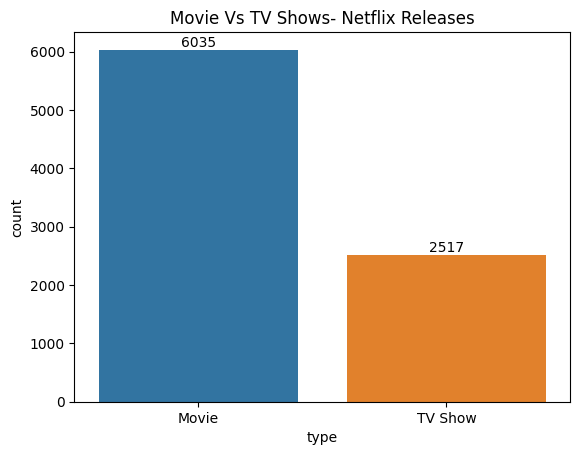

In [81]:
## Basic visualization 
ax=sns.countplot(x='type',data=category_type_unique)
ax.bar_label(ax.containers[0])
plt.title("Movie Vs TV Shows- Netflix Releases")
plt.show()

Insights - 

* There are more number of movies launched compared to TV shows in Netflix

### 4.2 Year added  comparision of shows(both movies and TV Shows)

In [82]:
added_year_category=df_final[['show_id','year_added']]
added_year_type_unique = added_year_category.drop_duplicates()

In [83]:
added_year_type_unique['year_added'].value_counts()

2019    1971
2020    1845
2018    1612
2021    1409
2017    1163
2016     415
2015      81
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: year_added, dtype: int64

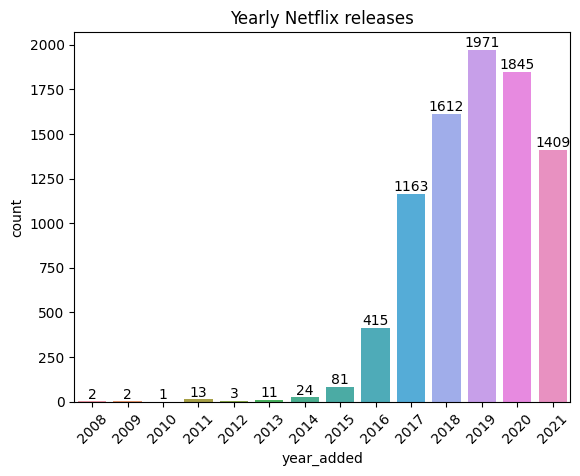

In [84]:
ax=sns.countplot(x='year_added',data=added_year_type_unique)
ax.bar_label(ax.containers[0])
plt.title("Yearly Netflix releases")
plt.xticks(rotation=45)
plt.show()

Insights - 

* From 2016 the release in Netflix OTT is increasing Trend and 2019 maximum shows are released

In [85]:
type_category_comparision=df_final[['year_added','show_id','type']]
type_category_comparision

,year_added,show_id,type
0,2021,s1,Movie
1,2021,s2,TV Show
2,2021,s2,TV Show
3,2021,s2,TV Show
4,2021,s2,TV Show
...,...,...,...
201732,2019,s8807,Movie
201733,2019,s8807,Movie
201734,2019,s8807,Movie
201735,2019,s8807,Movie


In [86]:
category_type_unique = type_category_comparision.drop_duplicates()
category_type_unique

,year_added,show_id,type
0,2021,s1,Movie
1,2021,s2,TV Show
58,2021,s3,TV Show
85,2021,s5,TV Show
109,2021,s6,TV Show
...,...,...,...
201615,2016,s8802,Movie
201651,2019,s8803,Movie
201681,2019,s8805,Movie
201695,2020,s8806,Movie


In [87]:
movies=category_type_unique[category_type_unique['type']=='Movie']
tv_shows=category_type_unique[category_type_unique['type']=='TV Show']
movie_year_wise=movies.groupby('year_added')[['type']].count()
tv_show_year_wise=tv_shows.groupby('year_added')[['type']].count()

In [88]:
movie_year_wise

,type
year_added,
2008,1
2009,2
2010,1
2011,13
2012,3
2013,6
2014,19
2015,55
2016,245


In [89]:
tv_show_year_wise

,type
year_added,
2008,1
2013,5
2014,5
2015,26
2016,170
2017,335
2018,386
2019,560
2020,571


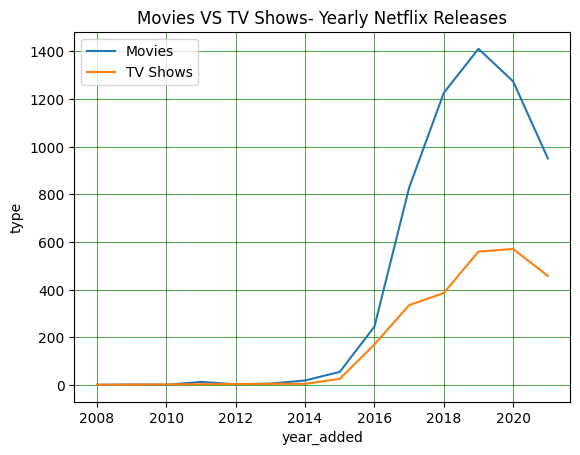

In [90]:
sns.lineplot(data=movie_year_wise,
 x="year_added",
 y="type",
 label='Movies')
sns.lineplot(data=tv_show_year_wise,
 x="year_added",
 y="type",
 label='TV Shows')
plt.grid(color="g",linewidth=0.5,linestyle="-")
plt.title("Movies VS TV Shows- Yearly Netflix Releases")

plt.show()


Insights - 

* We see a slow in the begining of 2014-2015 and From 2016 both TV Shows and Movies release in Netflix OTT is increasing Trend and 2019 maximum releases
* 2020 onwrads the number of shows added is declining. It could be due to beginning of Covid.It could also be due to coming of other OTTS like Amazon prime,hotstar etc

### 4.3 Country analysis of shows(both movies and TV Shows)

In [91]:
country_category=df_final[['country','show_id']]
country_comparision = country_category.drop_duplicates()
country_comparision

,country,show_id
0,United States,s1
1,South Africa,s2
58,France,s3
85,India,s5
109,United States,s6
...,...,...
201618,Jordan,s8802
201651,United States,s8803
201681,United States,s8805
201695,United States,s8806


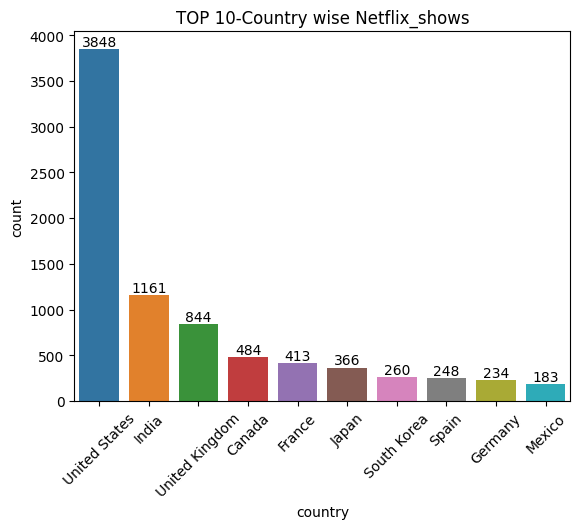

In [92]:
ax=sns.countplot(x='country',order=country_comparision['country'].value_counts().index[0:10],data=country_comparision)
ax.bar_label(ax.containers[0])
plt.title("TOP 10-Country wise Netflix_shows")
plt.xticks(rotation=45)
plt.show()

Insights - 

* Clearly United states has the maximum content followed by India and United Kingdom

### 4.4 TV Rating  analysis of shows(both movies and TV Shows)

In [93]:
TV_rating=df_final[['show_id','rating']]
TV_rating

,show_id,rating
0,s1,PG-13
1,s2,TV-MA
2,s2,TV-MA
3,s2,TV-MA
4,s2,TV-MA
...,...,...
201732,s8807,TV-14
201733,s8807,TV-14
201734,s8807,TV-14
201735,s8807,TV-14


In [94]:
# Drop duplicates and keep the first occurrence
TV_rating_unique = TV_rating.drop_duplicates()
TV_rating_unique

,show_id,rating
0,s1,PG-13
1,s2,TV-MA
58,s3,TV-MA
85,s5,TV-MA
109,s6,TV-MA
...,...,...
201615,s8802,TV-MA
201651,s8803,R
201681,s8805,R
201695,s8806,PG


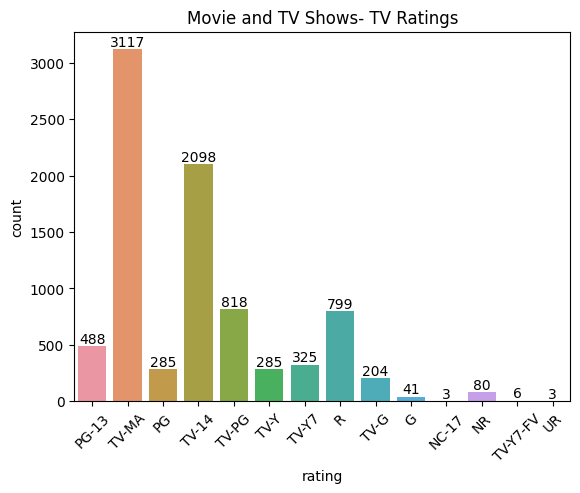

In [95]:
## Basic visualization 
ax=sns.countplot(x='rating',data=TV_rating_unique)
ax.bar_label(ax.containers[0])
plt.title("Movie and TV Shows- TV Ratings")
plt.xticks(rotation=45)
plt.show()

Insights - 

* Clearly Netflix has produced more shows for mature audience as TV-MA is the highest

### 4.5 Most popular Genre in Netflix 

In [96]:
genre=df_final[['show_id','listed_in']]
genre

,show_id,listed_in
0,s1,Documentaries
1,s2,International TV Shows
2,s2,TV Dramas
3,s2,TV Mysteries
4,s2,International TV Shows
...,...,...
201732,s8807,International Movies
201733,s8807,Music & Musicals
201734,s8807,Dramas
201735,s8807,International Movies


In [97]:
genre_unique = genre.drop_duplicates()
genre_unique

,show_id,listed_in
0,s1,Documentaries
1,s2,International TV Shows
2,s2,TV Dramas
3,s2,TV Mysteries
58,s3,Crime TV Shows
...,...,...
201695,s8806,Children & Family Movies
201696,s8806,Comedies
201713,s8807,Dramas
201714,s8807,International Movies


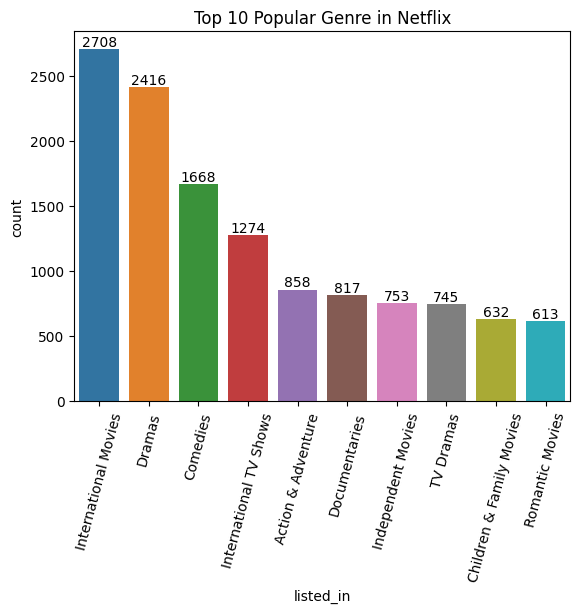

In [98]:
## Basic visualization 
ax=sns.countplot(x='listed_in',data=genre_unique, order=genre_unique['listed_in'].value_counts().index[0:10])
ax.bar_label(ax.containers[0])
plt.title("Top 10 Popular Genre in Netflix")
plt.xticks(rotation=75)
plt.show()

Insights - 

* Most popular genre in netflix is International Movies follwed by Dramas and then Comedies.

### 4.6 Most popular Genre in Netflix Movies and TV Shows comparision

In [99]:
genre_compare=df_final[['show_id','type','listed_in']].drop_duplicates()
genre_compare

,show_id,type,listed_in
0,s1,Movie,Documentaries
1,s2,TV Show,International TV Shows
2,s2,TV Show,TV Dramas
3,s2,TV Show,TV Mysteries
58,s3,TV Show,Crime TV Shows
...,...,...,...
201695,s8806,Movie,Children & Family Movies
201696,s8806,Movie,Comedies
201713,s8807,Movie,Dramas
201714,s8807,Movie,International Movies


In [100]:
genre_compare_movies= genre_compare[genre_compare['type']=='Movie']
genre_compare_tv_shows= genre_compare[genre_compare['type']=='TV Show']


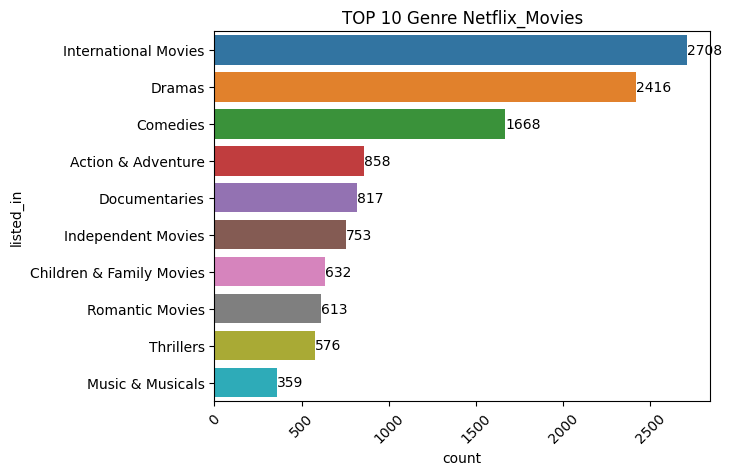

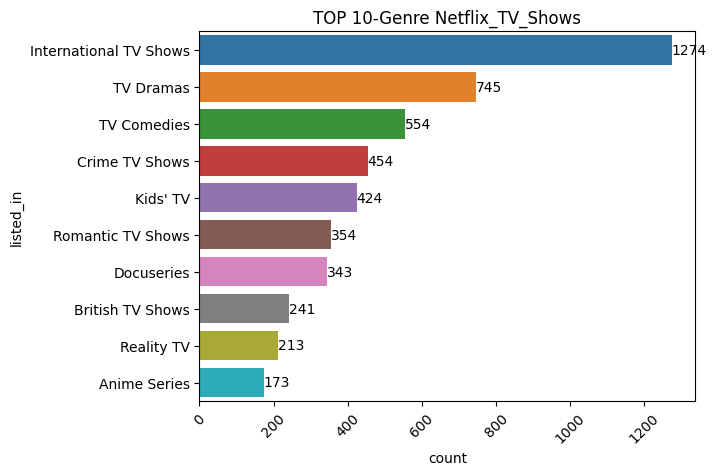

In [101]:
ax=sns.countplot(y='listed_in',order=genre_compare_movies['listed_in'].value_counts().index[0:10],data=genre_compare_movies)
ax.bar_label(ax.containers[0])
plt.title("TOP 10 Genre Netflix_Movies")
plt.xticks(rotation=45)
plt.show()

ax=sns.countplot(y='listed_in',order=genre_compare_tv_shows['listed_in'].value_counts().index[0:10],data=genre_compare_tv_shows)
ax.bar_label(ax.containers[0])
plt.title("TOP 10-Genre Netflix_TV_Shows")
plt.xticks(rotation=45)
plt.show()


Insights - 

* It looks like both movies and TV shows the top 3 Most popular genre in netflix is International Movies follwed by Dramas and then Comedies.

### 4.7 Comparison of tv shows vs. movies added in netflix countrywise

In [102]:
type_country=df_final[['country','show_id','type']]
type_country

,country,show_id,type
0,United States,s1,Movie
1,South Africa,s2,TV Show
2,South Africa,s2,TV Show
3,South Africa,s2,TV Show
4,South Africa,s2,TV Show
...,...,...,...
201732,India,s8807,Movie
201733,India,s8807,Movie
201734,India,s8807,Movie
201735,India,s8807,Movie


In [103]:
type_country_unique=type_country.drop_duplicates()
type_country_unique

,country,show_id,type
0,United States,s1,Movie
1,South Africa,s2,TV Show
58,France,s3,TV Show
85,India,s5,TV Show
109,United States,s6,TV Show
...,...,...,...
201618,Jordan,s8802,Movie
201651,United States,s8803,Movie
201681,United States,s8805,Movie
201695,United States,s8806,Movie


In [104]:
movies=type_country_unique[type_country_unique['type']=='Movie']
tv_shows=type_country_unique[type_country_unique['type']=='TV Show']
movies

,country,show_id,type
0,United States,s1,Movie
157,United States,s7,Movie
177,United States,s8,Movie
180,Ghana,s8,Movie
183,Burkina Faso,s8,Movie
...,...,...,...
201618,Jordan,s8802,Movie
201651,United States,s8803,Movie
201681,United States,s8805,Movie
201695,United States,s8806,Movie


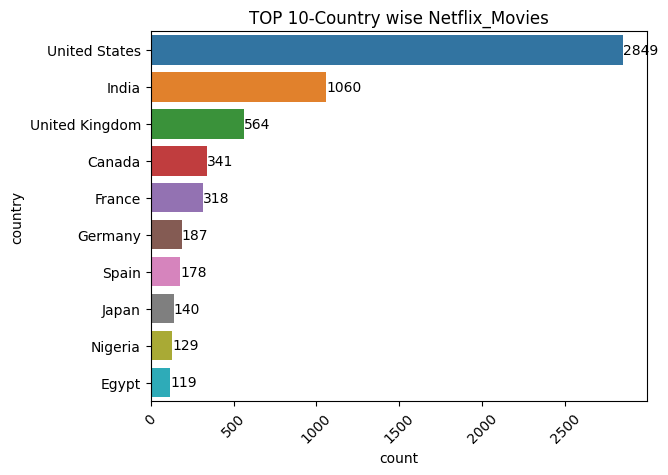

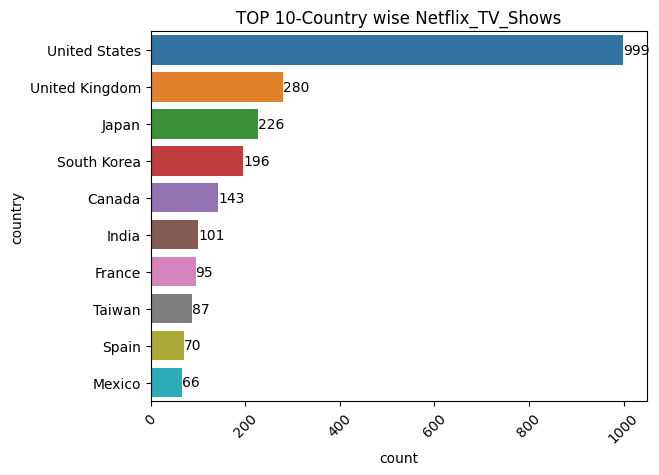

In [105]:
ax=sns.countplot(y='country',order=movies['country'].value_counts().index[0:10],data=movies)
ax.bar_label(ax.containers[0])
plt.title("TOP 10-Country wise Netflix_Movies")
plt.xticks(rotation=45)
plt.show()

ax=sns.countplot(y='country',order=tv_shows['country'].value_counts().index[0:10],data=tv_shows)
ax.bar_label(ax.containers[0])
plt.title("TOP 10-Country wise Netflix_TV_Shows")
plt.xticks(rotation=45)
plt.show()




Insights - 

* Clearly United states has the maximum content in both TV Shows and Movies.
* India and UK is second maximum content in Movies and TV Shows respectively

## 5.Analysis of actors/directors of different types of shows/movies.


### 5.1 Top 10 actors who have appeared in most movies 

In [106]:
df1=df_final[['show_id','cast','type']]
df1

,show_id,cast,type
0,s1,James Franco,Movie
1,s2,Ama Qamata,TV Show
2,s2,Ama Qamata,TV Show
3,s2,Ama Qamata,TV Show
4,s2,Khosi Ngema,TV Show
...,...,...,...
201732,s8807,Anita Shabdish,Movie
201733,s8807,Anita Shabdish,Movie
201734,s8807,Chittaranjan Tripathy,Movie
201735,s8807,Chittaranjan Tripathy,Movie


In [107]:
actor_movies=df1[df1['type']=='Movie'].drop_duplicates()
actor_TVshows=df1[df1['type']=='TV Show'].drop_duplicates()

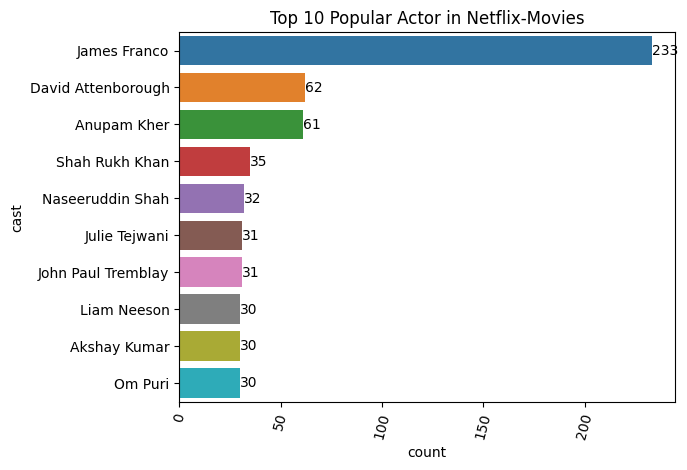

In [108]:
## Basic visualization 
ax=sns.countplot(y='cast',data=actor_movies, order=actor_movies['cast'].value_counts().index[0:10])
ax.bar_label(ax.containers[0])
plt.title("Top 10 Popular Actor in Netflix-Movies")
plt.xticks(rotation=75)
plt.show()

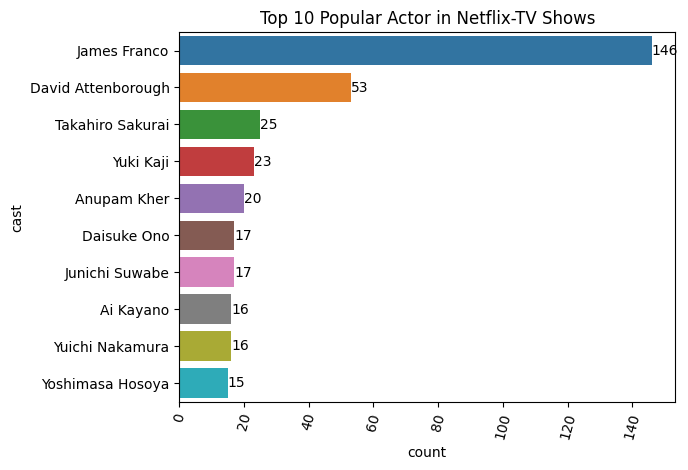

In [109]:
## Basic visualization 
ax=sns.countplot(y='cast',data=actor_TVshows, order=actor_TVshows['cast'].value_counts().index[0:10])
ax.bar_label(ax.containers[0])
plt.title("Top 10 Popular Actor in Netflix-TV Shows")
plt.xticks(rotation=75)
plt.show()

Insights - 

* Most Popular Actor in both TV shows and movies is James Franco, followed by David Attenborough


###  5.2 Top 10 directors who have appeared in most movies 

In [110]:
df2=df_final[['show_id','director','type']]
director_movies=df2[df2['type']=='Movie'].drop_duplicates()
director_TVshows=df2[df2['type']=='TV Show'].drop_duplicates()

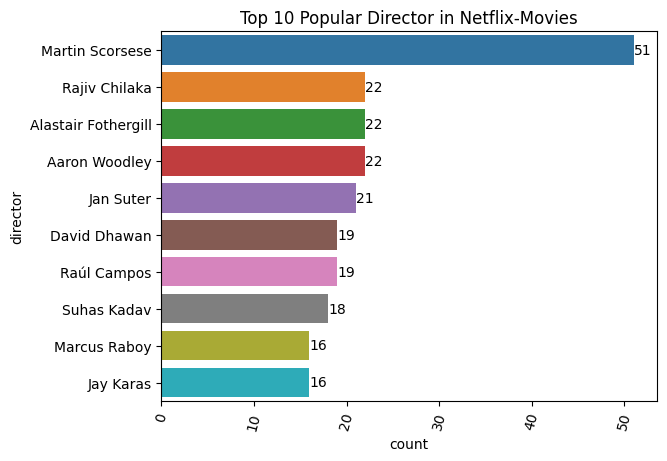

In [111]:
ax=sns.countplot(y='director',data=director_movies, order=director_movies['director'].value_counts().index[0:10])
ax.bar_label(ax.containers[0])
plt.title("Top 10 Popular Director in Netflix-Movies")
plt.xticks(rotation=75)
plt.show()

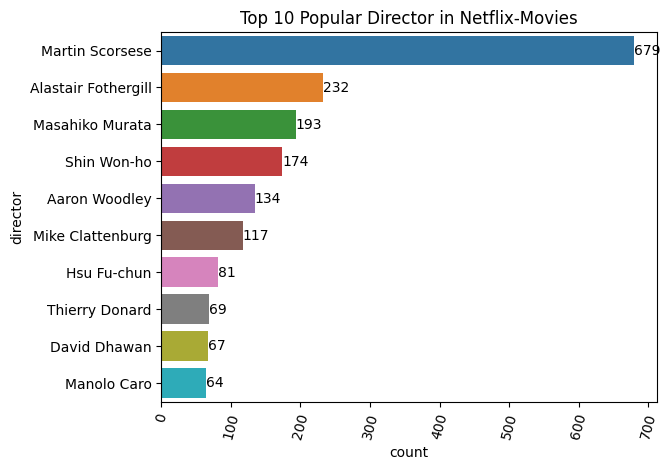

In [112]:
ax=sns.countplot(y='director',data=director_TVshows, order=director_TVshows['director'].value_counts().index[0:10])
ax.bar_label(ax.containers[0])
plt.title("Top 10 Popular Director in Netflix-Movies")
plt.xticks(rotation=75)
plt.show()

Insights - 

* Most Popular Director in both TV shows and movies is Martin Scorsese


### 5.3 Most actor dirctor pair relases in Netflix OTT

In [113]:
df_final.groupby(['cast','director'])['title'].count().sort_values(ascending=False).head()

cast                director           
James Franco        Aaron Woodley          259
David Attenborough  Alastair Fothergill    207
Anupam Kher         David Dhawan            67
Takahiro Sakurai    Hiroyuki Seshita        64
Yuki Kaji           Hiroyuki Seshita        58
Name: title, dtype: int64

In [114]:
actor_director_pair=df_final.groupby(['cast','director'])['title'].nunique().sort_values(ascending=False).head()
actor_director_pair

cast                director           
James Franco        Aaron Woodley          146
David Attenborough  Alastair Fothergill     62
Takahiro Sakurai    Hiroyuki Seshita        28
Julie Tejwani       Rajiv Chilaka           27
Yuki Kaji           Hiroyuki Seshita        25
Name: title, dtype: int64

In [115]:
df_ad_pair=pd.DataFrame(actor_director_pair).reset_index()
df_ad_pair['pair']=df_ad_pair['cast']+"/"+df_ad_pair['director']
df_ad_pair

,cast,director,title,pair
0,James Franco,Aaron Woodley,146,James Franco/Aaron Woodley
1,David Attenborough,Alastair Fothergill,62,David Attenborough/Alastair Fothergill
2,Takahiro Sakurai,Hiroyuki Seshita,28,Takahiro Sakurai/Hiroyuki Seshita
3,Julie Tejwani,Rajiv Chilaka,27,Julie Tejwani/Rajiv Chilaka
4,Yuki Kaji,Hiroyuki Seshita,25,Yuki Kaji/Hiroyuki Seshita


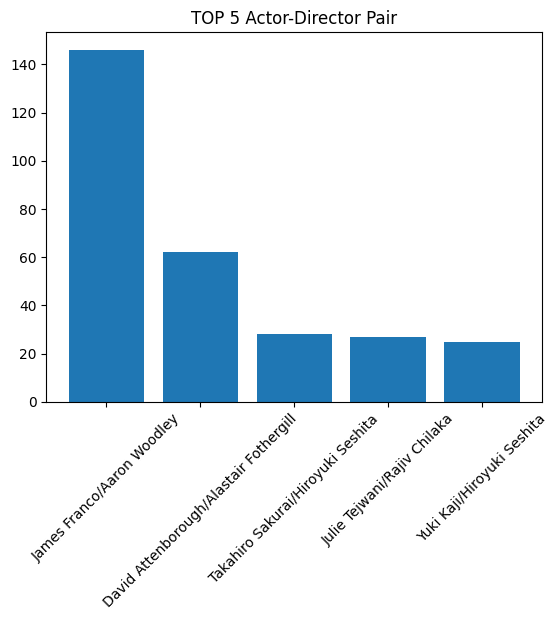

In [116]:
plt.bar(x='pair',height='title',data=df_ad_pair)
plt.xticks(rotation=45)
plt.title("TOP 5 Actor-Director Pair")
plt.show()

Insights - 

* Acto director who has worked most number of times is James Franco/Aaron Woodley followed by David Attenborough/Alastair Fothergill

## 6. lets analyse movies and TV Shows in terms of duration

### 6.1 We can see that duration column is not numerical. Lets change it to numerical for better analysys

In [117]:
movie_df=df_final[df_final['type']=='Movie']
tv_show_df=df_final[df_final['type']=='TV Show']

In [118]:
movie_df['duration']=movie_df['duration'].apply(lambda x:x.replace(' min','') if 'min' in x else x)
movie_df.head(3)

,index,show_id,type,title,release_year,rating,duration,description,year_added,month_added,day_added,cast,director,country,listed_in
0,0,s1,Movie,Dick Johnson Is Dead,2020,PG-13,90,"As her father nears the end of his life, filmm...",2021,9,Saturday,James Franco,Kirsten Johnson,United States,Documentaries
157,6,s7,Movie,My Little Pony: A New Generation,2021,PG,91,Equestria's divided. But a bright-eyed hero be...,2021,9,Friday,Vanessa Hudgens,Robert Cullen,United States,Children & Family Movies
158,6,s7,Movie,My Little Pony: A New Generation,2021,PG,91,Equestria's divided. But a bright-eyed hero be...,2021,9,Friday,Vanessa Hudgens,José Luis Ucha,United States,Children & Family Movies


In [119]:
tv_show_df['duration']=tv_show_df['duration'].apply(lambda x:x.replace(' Season','') if 'Season' in x else x)
tv_show_df.head(3)

,index,show_id,type,title,release_year,rating,duration,description,year_added,month_added,day_added,cast,director,country,listed_in
1,1,s2,TV Show,Blood & Water,2021,TV-MA,2s,"After crossing paths at a party, a Cape Town t...",2021,9,Friday,Ama Qamata,Adze Ugah,South Africa,International TV Shows
2,1,s2,TV Show,Blood & Water,2021,TV-MA,2s,"After crossing paths at a party, a Cape Town t...",2021,9,Friday,Ama Qamata,Adze Ugah,South Africa,TV Dramas
3,1,s2,TV Show,Blood & Water,2021,TV-MA,2s,"After crossing paths at a party, a Cape Town t...",2021,9,Friday,Ama Qamata,Adze Ugah,South Africa,TV Mysteries


In [120]:
tv_show_df['duration']=tv_show_df['duration'].apply(lambda x:x.replace('s','') if 's' in x else x)
tv_show_df.head(3)

,index,show_id,type,title,release_year,rating,duration,description,year_added,month_added,day_added,cast,director,country,listed_in
1,1,s2,TV Show,Blood & Water,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",2021,9,Friday,Ama Qamata,Adze Ugah,South Africa,International TV Shows
2,1,s2,TV Show,Blood & Water,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",2021,9,Friday,Ama Qamata,Adze Ugah,South Africa,TV Dramas
3,1,s2,TV Show,Blood & Water,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",2021,9,Friday,Ama Qamata,Adze Ugah,South Africa,TV Mysteries


In [121]:
tv_show_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52984 entries, 1 to 201614
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         52984 non-null  int64 
 1   show_id       52984 non-null  object
 2   type          52984 non-null  object
 3   title         52984 non-null  object
 4   release_year  52984 non-null  int64 
 5   rating        52984 non-null  object
 6   duration      52984 non-null  object
 7   description   52984 non-null  object
 8   year_added    52984 non-null  int32 
 9   month_added   52984 non-null  int32 
 10  day_added     52984 non-null  object
 11  cast          52984 non-null  object
 12  director      52984 non-null  object
 13  country       52984 non-null  object
 14  listed_in     52984 non-null  object
dtypes: int32(2), int64(2), object(11)
memory usage: 6.1+ MB


In [122]:
## change datatype as well
tv_show_df['duration']=tv_show_df['duration'].astype(str).astype(int)
tv_show_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 52984 entries, 1 to 201614
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         52984 non-null  int64 
 1   show_id       52984 non-null  object
 2   type          52984 non-null  object
 3   title         52984 non-null  object
 4   release_year  52984 non-null  int64 
 5   rating        52984 non-null  object
 6   duration      52984 non-null  int32 
 7   description   52984 non-null  object
 8   year_added    52984 non-null  int32 
 9   month_added   52984 non-null  int32 
 10  day_added     52984 non-null  object
 11  cast          52984 non-null  object
 12  director      52984 non-null  object
 13  country       52984 non-null  object
 14  listed_in     52984 non-null  object
dtypes: int32(3), int64(2), object(10)
memory usage: 5.9+ MB


In [123]:
movie_df['duration']=movie_df['duration'].astype(str).astype(int)
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143859 entries, 0 to 201736
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   index         143859 non-null  int64 
 1   show_id       143859 non-null  object
 2   type          143859 non-null  object
 3   title         143859 non-null  object
 4   release_year  143859 non-null  int64 
 5   rating        143859 non-null  object
 6   duration      143859 non-null  int32 
 7   description   143859 non-null  object
 8   year_added    143859 non-null  int32 
 9   month_added   143859 non-null  int32 
 10  day_added     143859 non-null  object
 11  cast          143859 non-null  object
 12  director      143859 non-null  object
 13  country       143859 non-null  object
 14  listed_in     143859 non-null  object
dtypes: int32(3), int64(2), object(10)
memory usage: 15.9+ MB


### 6.2 Lets find out shortest and longest 5 movies

In [124]:
movie_df_new=movie_df[['title','duration']]
movie_df_new.drop_duplicates().sort_values(by='duration').head(5)

,title,duration
89862,Silent,3
64732,Sol Levante,5
35946,Cops and Robbers,8
37643,Canvas,9
84245,American Factory: A Conversation with the Obamas,10


In [125]:
movie_df_new=movie_df[['title','duration']]
movie_df_new.drop_duplicates().sort_values(by='duration',ascending=False).head(5)

,title,duration
99195,Black Mirror: Bandersnatch,312
18357,Headspace: Unwind Your Mind,273
59141,The School of Mischief,253
59087,No Longer kids,237
59012,Lock Your Girls In,233


Insights - 

* Shortest Movie name is Silent and the duration is 3 min, followed by sol levante and cops and robbers for duration of 5 min and 8 min respectively
* Longest Movie name is Black Mirror:Bandersnatch and the duration is 312 min, followed by Headspace: Unwind Your Mind and The School of Mischief for duration of 273 min and 253 min respectively

### 6.3  Lets analyse the duration of most of the  movies using histogram and understand the distibution

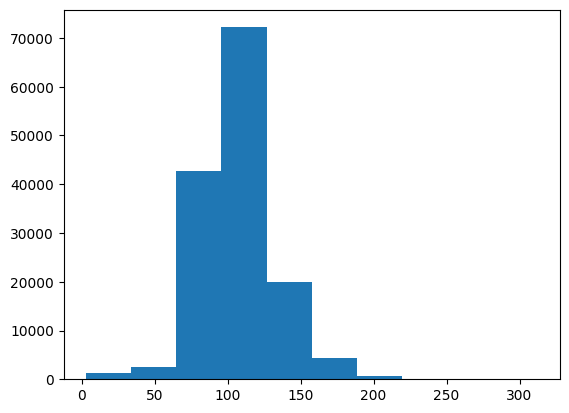

In [126]:
plt.hist(movie_df_new['duration'])
plt.show()

Insights - 

* Most of the movies have duration between 80-120 min
* Very few movies having duration more than 150 min

### 6.4 Lets find out shortest and longest 5 TV Shows

In [129]:
tv_show_df_new=tv_show_df[['title','duration']]
tv_show_df_new.drop_duplicates().sort_values(by='duration').head(5)

,title,duration
201588,Zindagi Gulzar Hai,1
83100,Bard of Blood,1
133412,Wet Hot American Summer,1
82884,The Liar and His Lover,1
82860,The K2,1


In [130]:
tv_show_df_new=tv_show_df[['title','duration']]
tv_show_df_new.drop_duplicates().sort_values(by='duration',ascending=False).head(5)

,title,duration
13532,Grey's Anatomy,17
111304,NCIS,15
57539,Supernatural,15
33044,Heartland,13
98765,COMEDIANS of the world,13


Insights - 

* Shortest season is of only 1 season
* Longest season TV show is Grey's Anatomy which has 17 seasons , followed by NCIS and supernatural with 15 season each.

### 6.5 Lets analyse the number of seasons for most of the TV series

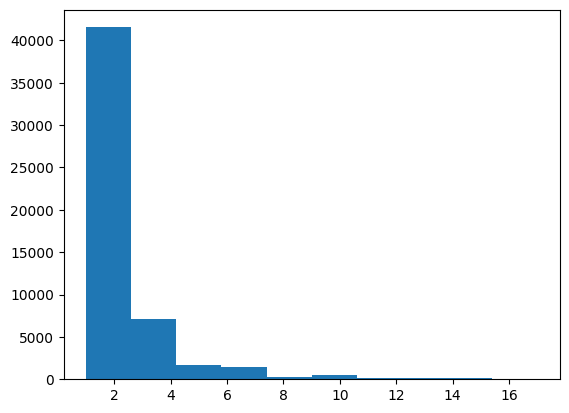

In [131]:
plt.hist(tv_show_df_new['duration'],bins=10)
plt.show()

Insights - 

* Most of the TV Series runs for  1 season, then 2,3 and 4


## 7. Best time to launch TV shows

### 7.1 Best day to launch Movies/TV Shows

In [132]:
day_added=df_final[['show_id','type','day_added']].drop_duplicates()
day_added

,show_id,type,day_added
0,s1,Movie,Saturday
1,s2,TV Show,Friday
58,s3,TV Show,Friday
85,s5,TV Show,Friday
109,s6,TV Show,Friday
...,...,...,...
201615,s8802,Movie,Wednesday
201651,s8803,Movie,Wednesday
201681,s8805,Movie,Friday
201695,s8806,Movie,Saturday


In [133]:
day_added_movie=day_added[day_added['type']=='Movie']
day_added_TV_show=day_added[day_added['type']=='TV Show']

In [134]:
day_added_movie

,show_id,type,day_added
0,s1,Movie,Saturday
157,s7,Movie,Friday
177,s8,Movie,Friday
329,s10,Movie,Friday
426,s13,Movie,Thursday
...,...,...,...
201615,s8802,Movie,Wednesday
201651,s8803,Movie,Wednesday
201681,s8805,Movie,Friday
201695,s8806,Movie,Saturday


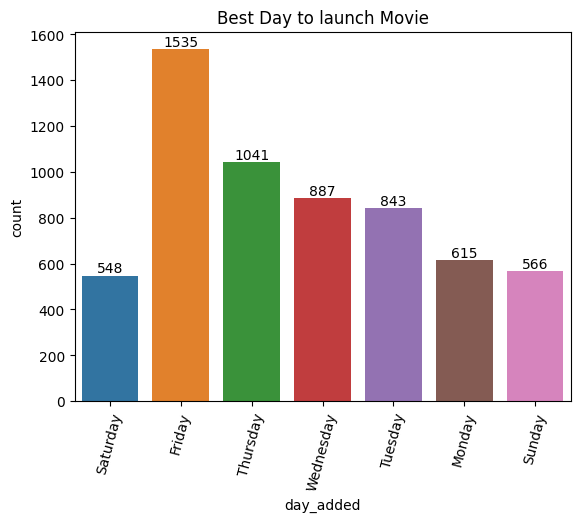

In [135]:
ax=sns.countplot(x='day_added',data=day_added_movie)
ax.bar_label(ax.containers[0])
plt.title("Best Day to launch Movie")
plt.xticks(rotation=75)
plt.show()

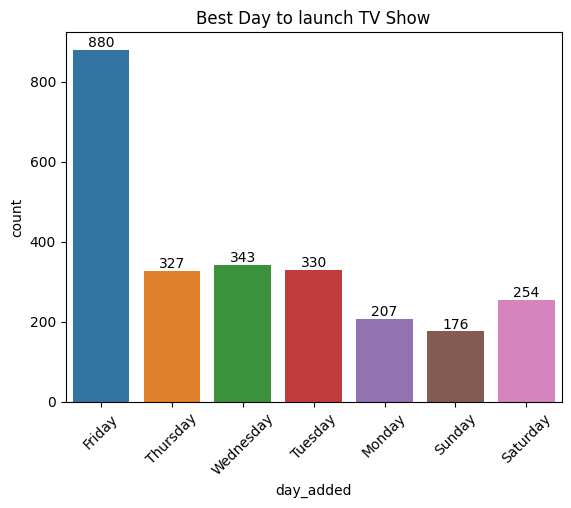

In [136]:
ax=sns.countplot(x='day_added',data=day_added_TV_show)
ax.bar_label(ax.containers[0])
plt.title("Best Day to launch TV Show")
plt.xticks(rotation=45)
plt.show()

Insights - 

* Clearly Best day to release movie or TV show is Friday as People are tend to watch more netflix content on Weekends

### 7.2 Best month to launch Movies/TV Shows

In [137]:
month_added=df_final[['show_id','type','month_added']].drop_duplicates()
month_added_movie=month_added[month_added['type']=='Movie']
month_added_TV_show=month_added[month_added['type']=='TV Show']

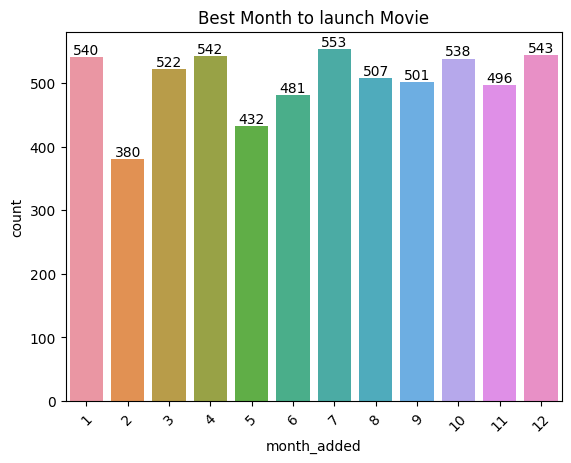

In [138]:
ax=sns.countplot(x='month_added',data=month_added_movie)
ax.bar_label(ax.containers[0])
plt.title("Best Month to launch Movie")
plt.xticks(rotation=45)
plt.show()

Insights - 

* Best launch month for Movies doesnt have much variance. It shows there not so much impact on months in addition of movies.
* No specific pattern in which we could see more movies are added in a particular month

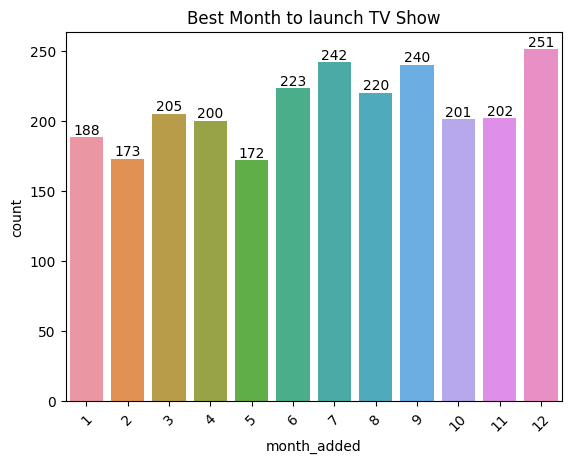

In [139]:
ax=sns.countplot(x='month_added',data=month_added_TV_show)
ax.bar_label(ax.containers[0])
plt.title("Best Month to launch TV Show")
plt.xticks(rotation=45)
plt.show()

Insights - 
* Second half has comparatively more content  released.Therefore, these months may be a good choice for the success of a new release

# Summary of  Insights from the netflix dataset:

* There are more number of movies launched compared to TV shows in Netflix


* We see a slow in the begining of 2014-2015 and From 2016 both TV Shows and Movies release in Netflix OTT is increasing Trend and 2019 maximum releases


* 2020 onwrads the number of shows added is declining. It could be due to beginning of Covid.It could also be due to coming of other OTTS like Amazon prime,hotstar etc


* United states has the maximum content followed by India and United Kingdom



* Netflix has produced more shows for mature audience as TV-MA is the highest follwed by TV-14.


* It looks like both movies and TV shows the top 3 Most popular genre in netflix is International Movies follwed by Dramas and  then Comedies.


* Clearly United states has the maximum content in both TV Shows and Movies.


* India and UK is second maximum content in Movies and TV Shows respectively


* Most Popular Actor in both TV shows and movies is James Franco, followed by David Attenborough


* Most Popular Director in both TV shows and movies is Martin Scorsese


* Acto director who has worked most number of times is James Franco/Aaron Woodley followed by David Attenborough/Alastair Fothergill


* Shortest Movie name is Silent and the duration is 3 min, followed by sol levante and cops and robbers for duration of 5 min and 8 min respectively


* Longest Movie name is Black Mirror:Bandersnatch and the duration is 312 min, followed by Headspace: Unwind Your Mind and The School of Mischief for duration of 273 min and 253 min respectively


* Most of the movies have duration between 80-120 min


* Very few movies having duration more than 150 min


* It can be inferred that having one season is the most preferred duration.

* Clearly Best day to release movie or TV show is Friday as People are tend to watch more netflix content on Weekends


* Best launch month for Movies doesnt have much variance. It shows there not so much impact on months in addition of movies.


* No specific pattern in which we could see more movies are added in a particular month


# Recommendations for Netflix decide which type of shows/movies to produce and how to grow the business.

* United States tops the chart for both movies and TV Shows release. Therefore max focus to be given to US shows as they are most famous 


* Intrestingly for country India the TV shows content is very much low compared to Movies content, it shows about bollywood influence in India. So movies in India to be priority.


* Netflix has produced more shows for mature audience as TV-MA is the highest follwed by TV-14 and it is popular as well
  It shows more mature/adult users are using netflix so more TV-MA/TV-14 can be launched in future to catter more audience and attract more customers for netflix
  
* Focus more on Drama, comdey genre as these are the most popular in terms of release movie genre


* Produce more movies of actor James Franco or release his movies as more audience are liking his movies in terms of number of releases.


* Produce more movies of director Martin Scorsese or release his movies as more audience are liking his directed movies in terms of number of releases.



* Also most liked actor director pair is James Franco/Aaron Woodley followed by David Attenborough/Alastair Fothergill. So more content of this pair can be produced by netflix or if any new movie is release then it can be relased in OTT netflix as well


* Best day to release movie or TV show is Friday as People are tend to watch more netflix content on Weekends


* Second half has comparatively more content  released.Therefore, these months may be a good choice for the success of a new release


* A good amount of movies on Netflix are among the duration of 80-120 mins. It can be assumed that fair amount of the audience cannot watch a 3 hour movie in one sitting.





